## Yiqiu Wang(EDA assignmnet)

### 1. Import the libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### 2. Data importing and cleaning

In [6]:
previous= pd.read_csv("previous_application.csv")
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
appli= pd.read_csv("application_data.csv")
appli.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Find the common columns between the two data frames
common_columns = set(previous.columns).intersection(appli.columns)

# Print or use the common columns
print("Common columns:", common_columns)

Common columns: {'WEEKDAY_APPR_PROCESS_START', 'AMT_ANNUITY', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE'}


After checking the description of the shared columns, it appears that these variables should not have obvious effect on the loan.  

#### Interesting variables in appli

In [11]:
## TARGET: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

# NAME_CONTRACT_TYPE: Identification if loan is cash or revolving

# DAYS_BIRTH: Client's age in days at the time of application
# CODE_GENDER: Gender of the client
# CNT_CHILDREN: Number of children the client has
# NAME_EDUCATION_TYPE: Level of highest education the client achieved
# NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,<85>)
# NAME_FAMILY_STATUS: Family status of the client
# NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)

# FLAG_OWN_CAR: Flag if the client owns a car
# FLAG_OWN_REALTY: Flag if client owns a house or flat

# DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan
# DAYS_LAST_PHONE_CHANGE: How many days before application did client change phone

# FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)
# FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)

# REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
# REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
# LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (1=different, 0=same, at region level)
# REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
# REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
# LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (1=different, 0=same, at city level)

#### Better to create a new data frame with fewer columns

In [13]:
col_need = ['TARGET','NAME_CONTRACT_TYPE','DAYS_BIRTH','CODE_GENDER','CNT_CHILDREN','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','FLAG_MOBIL','FLAG_CONT_MOBILE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
my_data = appli[col_need]
my_data.head()

,TARGET,NAME_CONTRACT_TYPE,DAYS_BIRTH,CODE_GENDER,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_OWN_CAR,...,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,FLAG_MOBIL,FLAG_CONT_MOBILE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,1,Cash loans,-9461,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,N,...,-2120,-1134.0,1,1,0,0,0,0,0,0
1,0,Cash loans,-16765,F,0,Higher education,State servant,Married,House / apartment,N,...,-291,-828.0,1,1,0,0,0,0,0,0
2,0,Revolving loans,-19046,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,Y,...,-2531,-815.0,1,1,0,0,0,0,0,0
3,0,Cash loans,-19005,F,0,Secondary / secondary special,Working,Civil marriage,House / apartment,N,...,-2437,-617.0,1,1,0,0,0,0,0,0
4,0,Cash loans,-19932,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,N,...,-3458,-1106.0,1,1,0,0,0,0,1,1


#### Information about the new data set

In [15]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   DAYS_BIRTH                   307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   NAME_EDUCATION_TYPE          307511 non-null  object 
 6   NAME_INCOME_TYPE             307511 non-null  object 
 7   NAME_FAMILY_STATUS           307511 non-null  object 
 8   NAME_HOUSING_TYPE            307511 non-null  object 
 9   FLAG_OWN_CAR                 307511 non-null  object 
 10  FLAG_OWN_REALTY              307511 non-null  object 
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 13 

#### Missing value

In [17]:
my_data.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
DAYS_BIRTH                     0
CODE_GENDER                    0
CNT_CHILDREN                   0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
DAYS_ID_PUBLISH                0
DAYS_LAST_PHONE_CHANGE         1
FLAG_MOBIL                     0
FLAG_CONT_MOBILE               0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

Vert Nice! Just one missing value in DAYS_LAST_PHONE_CHANGE

In [19]:
# We can just drop this individual
my_data= my_data[~my_data.DAYS_LAST_PHONE_CHANGE.isnull()]
my_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

#### New columns

In [21]:
# name_contract_type
my_data.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

90% of the loan belong to cash category

In [23]:
## DAYS_BIRTH
# are the values all negative?
if (my_data['DAYS_BIRTH'] < 0).all():
    print(f"All values in DAYS_BIRTH are negative integers.")
else:
    print(f"Not all values in DAYS_BIRTH are negative integers.")

All values in DAYS_BIRTH are negative integers.


In [24]:
# Then we should make the value positive and to make the days into years
my_data['AGE_YEAR'] = (my_data['DAYS_BIRTH']*(-1)//365).astype(int)  # I want integer value in this column

In [25]:
# drop "DAYS_BIRTH"
my_data.drop("DAYS_BIRTH", axis= 1, inplace= True)

In [26]:
# my_data.head()
# will check this everytime after creating and droping new columns

In [27]:
## CODE_GENDER
my_data.CODE_GENDER.value_counts(normalize = True)

F      0.658346
M      0.341641
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [28]:
# no idea about what XNA means but considering so few individuals have this value, we can drop rows containing this value in CODE_GENDER
my_data.drop(my_data[my_data['CODE_GENDER'] == 'XNA'].index, inplace=True)

In [29]:
## CNT_CHILDREN
# it is useless to have float values here
my_data.CNT_CHILDREN.astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307506, dtype: int64

In [30]:
## NAME_EDUCATION_TYPE
my_data.NAME_EDUCATION_TYPE.value_counts(normalize = True)

Secondary / secondary special    0.710194
Higher education                 0.243449
Incomplete higher                0.033414
Lower secondary                  0.012410
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

Proper order should be Lower secondary, Secondary / secondary special, Incomplete higher, Higher education, Academic degree

In [32]:
# NAME_INCOME_TYPE
my_data.NAME_INCOME_TYPE.value_counts(normalize = True)

Working                 0.516315
Commercial associate    0.232893
Pensioner               0.180036
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [33]:
## NAME_FAMILY_STATUS
my_data.NAME_FAMILY_STATUS.value_counts(normalize = True)

Married                 0.638778
Single / not married    0.147782
Civil marriage          0.096824
Separated               0.064291
Widow                   0.052318
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [34]:
# drop rows with "Unknown"
my_data.drop(my_data[my_data['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace=True)

In [35]:
## NAME_HOUSING_TYPE
my_data.NAME_HOUSING_TYPE.value_counts(normalize = True)

House / apartment      0.887348
With parents           0.048260
Municipal apartment    0.036361
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

In [36]:
## FLAG_OWN_CAR
my_data.FLAG_OWN_CAR.value_counts(normalize = True)

N    0.659894
Y    0.340106
Name: FLAG_OWN_CAR, dtype: float64

In [37]:
## FLAG_OWN_REALTY
my_data.FLAG_OWN_REALTY.value_counts(normalize = True)

Y    0.693666
N    0.306334
Name: FLAG_OWN_REALTY, dtype: float64

In [38]:
## DAYS_LAST_PHONE_CHANGE
my_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307504.000000
mean       -962.861833
std         826.813977
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [39]:
# We should make the value positive and to make the days into years
my_data['Years_LAST_PHONE_CHANGE'] = (my_data['DAYS_LAST_PHONE_CHANGE']*(-1)//365).astype(int)

In [40]:
my_data.Years_LAST_PHONE_CHANGE.describe()

count    307504.000000
mean          2.225126
std           2.193691
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: Years_LAST_PHONE_CHANGE, dtype: float64

In [41]:
# Drop the original column
my_data.drop("DAYS_LAST_PHONE_CHANGE", axis= 1, inplace= True)

In [42]:
## Do the same for "DAYS_ID_PUBLISH"
my_data.DAYS_ID_PUBLISH.describe()

count    307504.000000
mean      -2994.207679
std        1509.453373
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [43]:
my_data['Years_LAST_ID_CHANGE'] = (my_data['DAYS_ID_PUBLISH']*(-1)//365).astype(int)

In [44]:
my_data.Years_LAST_ID_CHANGE.describe()

count    307504.000000
mean          7.713490
std           4.134522
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: Years_LAST_ID_CHANGE, dtype: float64

In [45]:
my_data.drop("DAYS_ID_PUBLISH", axis= 1, inplace= True)

In [46]:
## create a new column to access the validity of contact(reachable cellphone number)
my_data['CONTACT_VALIDITY_MOBIL'] = my_data['FLAG_MOBIL'] + my_data['FLAG_CONT_MOBILE']

In [47]:
# drop the used two columns
my_data.drop(["FLAG_MOBIL","FLAG_CONT_MOBILE"], axis= 1, inplace= True)

In [48]:
# check new column CONTACT_VALIDITY_MOBIL
my_data['CONTACT_VALIDITY_MOBIL'] = my_data['CONTACT_VALIDITY_MOBIL'].astype(str)
my_data.CONTACT_VALIDITY_MOBIL.value_counts(normalize = True)

2    0.998133
1    0.001867
Name: CONTACT_VALIDITY_MOBIL, dtype: float64

Value 2 means a reachable cellphone number is provided. 1 means the provided cellphone number is not reachable.

In [50]:
## create a new column to access the validity of address
my_data['ADDRESS_VALIDITY'] = (my_data['REG_REGION_NOT_LIVE_REGION'] + my_data['REG_REGION_NOT_WORK_REGION'] + my_data['LIVE_REGION_NOT_WORK_REGION'] + my_data['REG_CITY_NOT_LIVE_CITY'] + my_data['REG_CITY_NOT_WORK_CITY'] + my_data['LIVE_CITY_NOT_WORK_CITY']).astype(str) 

In [51]:
# drop the used columns
my_data.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis= 1, inplace= True)

In [52]:
# check the new column
my_data.ADDRESS_VALIDITY.value_counts(normalize = True)

0    0.742585
2    0.208378
4    0.031034
3    0.009603
1    0.004504
5    0.002826
6    0.001070
Name: ADDRESS_VALIDITY, dtype: float64

Lower value means higher validity of address provided.

### 3. Final Data Frame

In [55]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307504 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   TARGET                   307504 non-null  int64 
 1   NAME_CONTRACT_TYPE       307504 non-null  object
 2   CODE_GENDER              307504 non-null  object
 3   CNT_CHILDREN             307504 non-null  int64 
 4   NAME_EDUCATION_TYPE      307504 non-null  object
 5   NAME_INCOME_TYPE         307504 non-null  object
 6   NAME_FAMILY_STATUS       307504 non-null  object
 7   NAME_HOUSING_TYPE        307504 non-null  object
 8   FLAG_OWN_CAR             307504 non-null  object
 9   FLAG_OWN_REALTY          307504 non-null  object
 10  AGE_YEAR                 307504 non-null  int64 
 11  Years_LAST_PHONE_CHANGE  307504 non-null  int64 
 12  Years_LAST_ID_CHANGE     307504 non-null  int64 
 13  CONTACT_VALIDITY_MOBIL   307504 non-null  object
 14  ADDRESS_VALIDITY    

In [56]:
my_data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AGE_YEAR,Years_LAST_PHONE_CHANGE,Years_LAST_ID_CHANGE,CONTACT_VALIDITY_MOBIL,ADDRESS_VALIDITY
0,1,Cash loans,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,N,Y,25,3,5,2,0
1,0,Cash loans,F,0,Higher education,State servant,Married,House / apartment,N,N,45,2,0,2,0
2,0,Revolving loans,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,Y,Y,52,2,6,2,0
3,0,Cash loans,F,0,Secondary / secondary special,Working,Civil marriage,House / apartment,N,Y,52,1,6,2,0
4,0,Cash loans,M,0,Secondary / secondary special,Working,Single / not married,House / apartment,N,Y,54,3,9,2,2


### 4. Visualisation

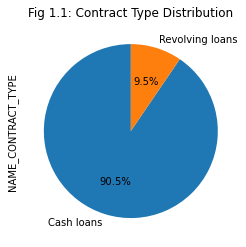

In [58]:
## Contact Type
my_data.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.pie(startangle=90, autopct='%1.1f%%')
plt.title('Fig 1.1: Contract Type Distribution')
plt.show()

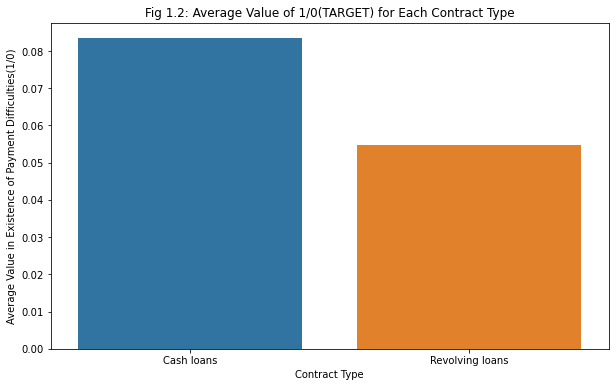

In [59]:
average_values = my_data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=average_values)
plt.title('Fig 1.2: Average Value of 1/0(TARGET) for Each Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

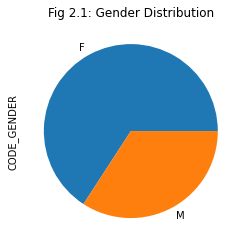

In [60]:
## Gender
my_data.CODE_GENDER.value_counts(normalize = True).plot.pie()
plt.title('Fig 2.1: Gender Distribution')
plt.show()

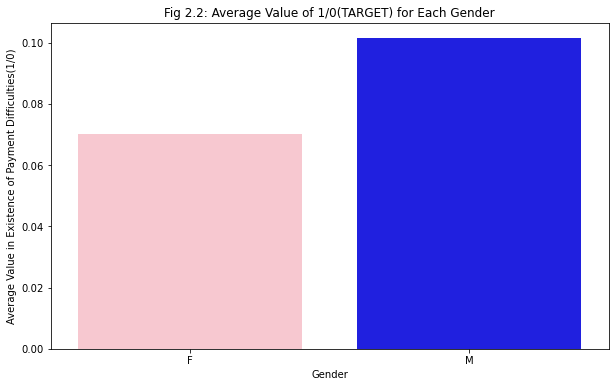

In [61]:
average_values = my_data.groupby('CODE_GENDER')['TARGET'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='CODE_GENDER', y='TARGET', data=average_values, palette=['pink','blue'])
plt.title('Fig 2.2: Average Value of 1/0(TARGET) for Each Gender')
plt.xlabel('Gender')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

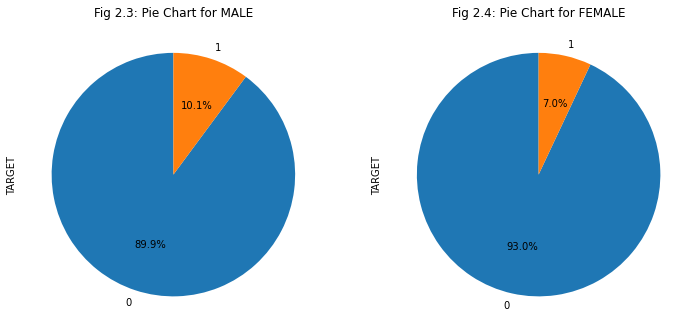

In [62]:
# Separate the data based on the value of "TARGET"
target_1_data = my_data[my_data['TARGET'] == 1]
target_0_data = my_data[my_data['TARGET'] == 0]
# Separate the data based on Gender
M_data = my_data[my_data['CODE_GENDER'] == 'M']
F_data = my_data[my_data['CODE_GENDER'] == 'F']
# change "TARGET" into string for now
my_data['TARGET'] = my_data['TARGET'].astype(str)

# Plotting pie chart for TARGET=1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for TARGET=1
M_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fig 2.3: Pie Chart for MALE')

# Plotting pie chart for TARGET=0
plt.subplot(1, 2, 2)  # Subplot for TARGET=0
F_data['TARGET'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fig 2.4: Pie Chart for FEMALE')

plt.show()

# change "TARGET" back to integer
my_data['TARGET'] = my_data['TARGET'].astype(int)

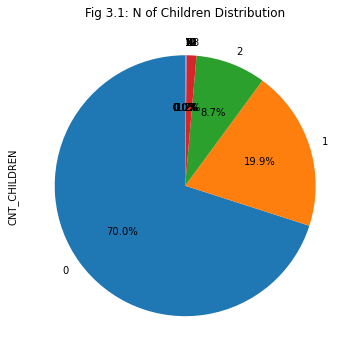

In [63]:
## CNT_CHILDREN
# pie plot for distribution of n of children
plt.figure(figsize=(12, 6))
my_data.CNT_CHILDREN.value_counts(normalize = True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fig 3.1: N of Children Distribution')
plt.show()

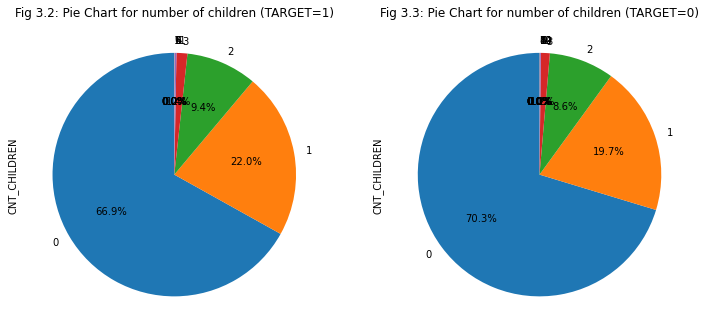

In [64]:
# Plotting pie chart for TARGET=1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for TARGET=1
target_1_data['CNT_CHILDREN'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fig 3.2: Pie Chart for number of children (TARGET=1)')

# Plotting pie chart for TARGET=0
plt.subplot(1, 2, 2)  # Subplot for TARGET=0
target_0_data['CNT_CHILDREN'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fig 3.3: Pie Chart for number of children (TARGET=0)')

plt.show()

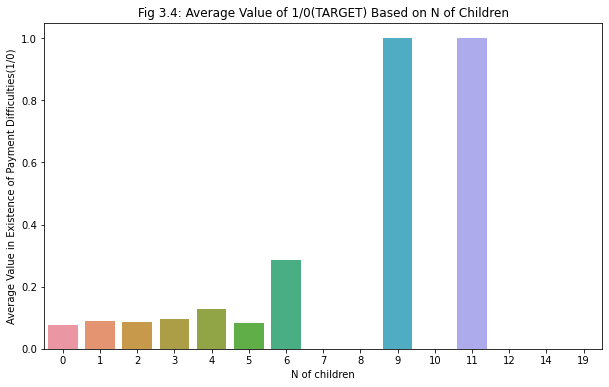

In [65]:
# bar plot
average_values = my_data.groupby('CNT_CHILDREN')['TARGET'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='CNT_CHILDREN', y='TARGET', data=average_values)
plt.title('Fig 3.4: Average Value of 1/0(TARGET) Based on N of Children')
plt.xlabel('N of children')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

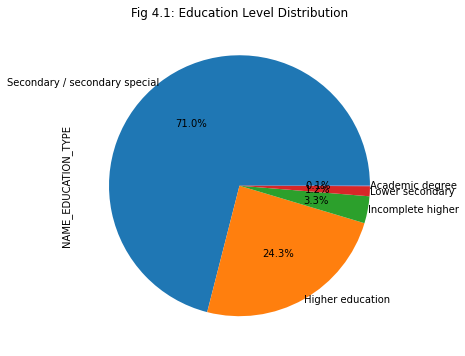

In [66]:
## NAME_EDUCATION_TYPE
plt.figure(figsize=(10, 6))
my_data.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1)
plt.title('Fig 4.1: Education Level Distribution')
plt.show()

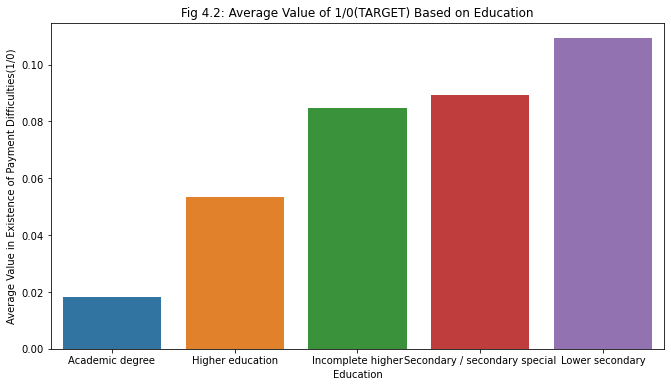

In [67]:
average_values = my_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().reset_index()

# Create a list with the desired order of education types
desired_order = ['Academic degree', 'Higher education', 'Incomplete higher', 'Secondary / secondary special','Lower secondary']

plt.figure(figsize=(11, 6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='TARGET', data=average_values,order=desired_order)
plt.title('Fig 4.2: Average Value of 1/0(TARGET) Based on Education')
plt.xlabel('Education')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

In [68]:
## NAME_INCOME_TYPE
my_data.NAME_INCOME_TYPE.value_counts(normalize = True)

Working                 0.516318
Commercial associate    0.232888
Pensioner               0.180037
State servant           0.070578
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

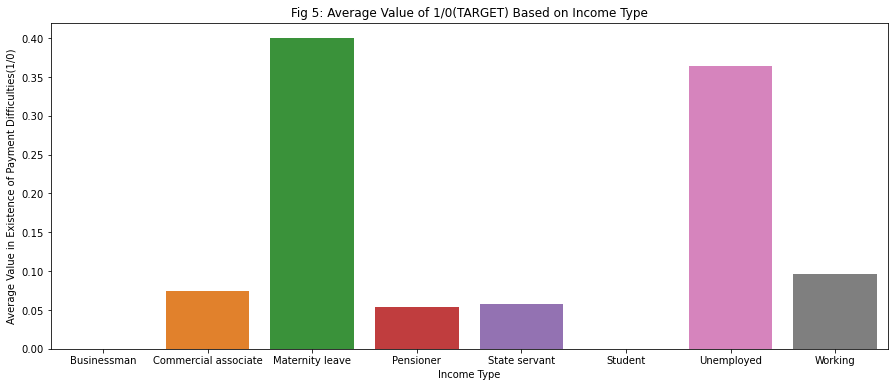

In [69]:
average_values = my_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='NAME_INCOME_TYPE', y='TARGET', data=average_values)
plt.title('Fig 5: Average Value of 1/0(TARGET) Based on Income Type')
plt.xlabel('Income Type')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

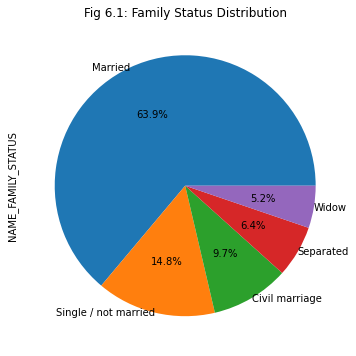

In [70]:
## NAME_FAMILY_STATUS
plt.figure(figsize=(10, 6))
my_data.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1)
plt.title('Fig 6.1: Family Status Distribution')
plt.show()

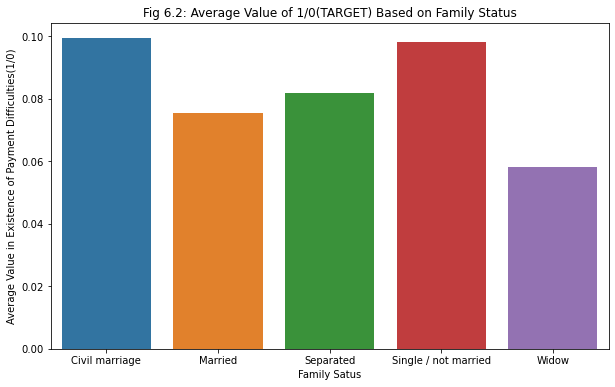

In [71]:
average_values = my_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_FAMILY_STATUS', y='TARGET', data=average_values)
plt.title('Fig 6.2: Average Value of 1/0(TARGET) Based on Family Status')
plt.xlabel('Family Satus')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

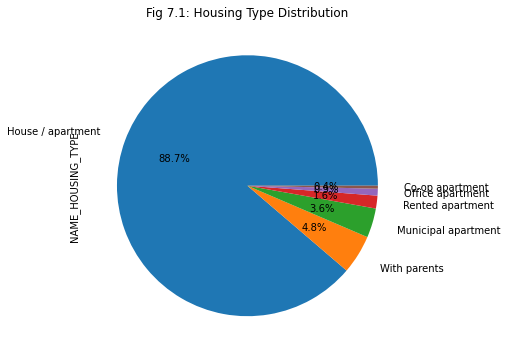

In [72]:
## NAME_HOUSING_TYPE
plt.figure(figsize=(10, 6))
my_data.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1.2)
plt.title('Fig 7.1: Housing Type Distribution')
plt.show()

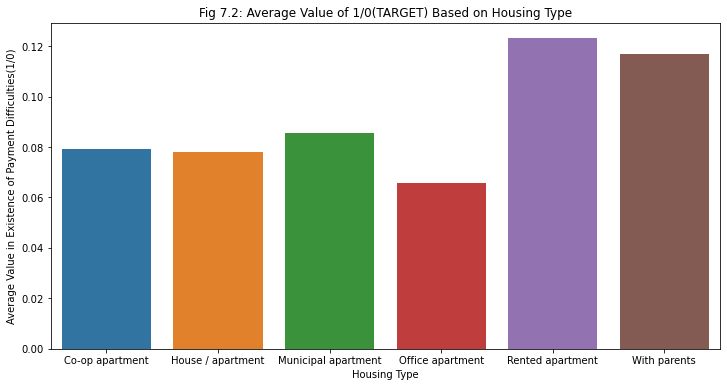

In [73]:
average_values = my_data.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET', data=average_values)
plt.title('Fig 7.2: Average Value of 1/0(TARGET) Based on Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

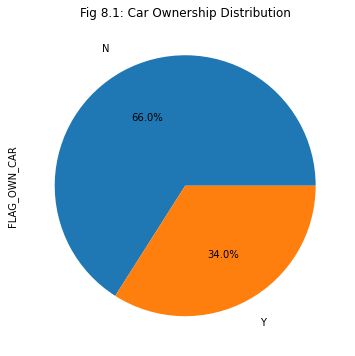

In [74]:
## FLAG_OWN_CAR
plt.figure(figsize=(10, 6))
my_data.FLAG_OWN_CAR.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1.2)
plt.title('Fig 8.1: Car Ownership Distribution')
plt.show()

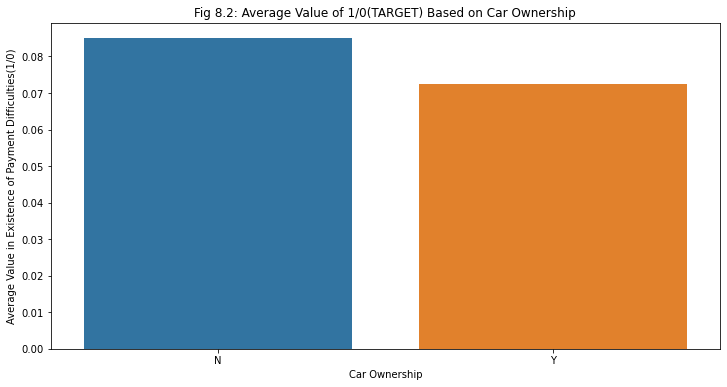

In [75]:
average_values = my_data.groupby('FLAG_OWN_CAR')['TARGET'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='FLAG_OWN_CAR', y='TARGET', data=average_values)
plt.title('Fig 8.2: Average Value of 1/0(TARGET) Based on Car Ownership')
plt.xlabel('Car Ownership')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

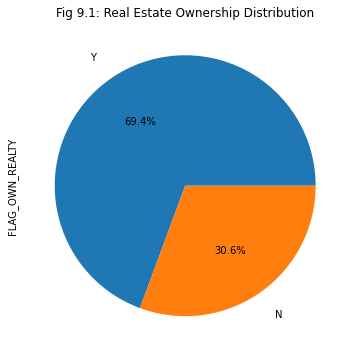

In [76]:
## FLAG_OWN_REALTY
plt.figure(figsize=(10, 6))
my_data.FLAG_OWN_REALTY.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1.2)
plt.title('Fig 9.1: Real Estate Ownership Distribution')
plt.show()

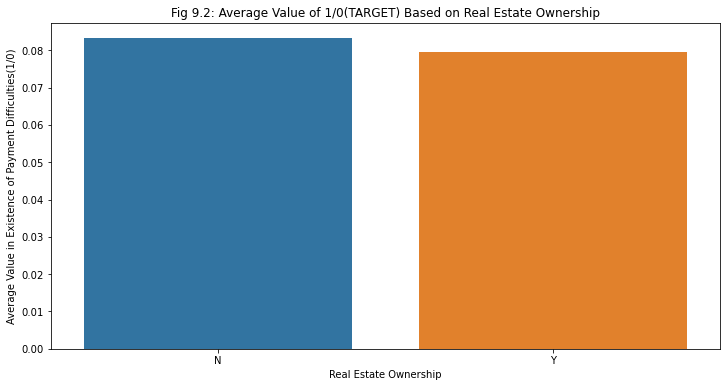

In [77]:
average_values = my_data.groupby('FLAG_OWN_REALTY')['TARGET'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='FLAG_OWN_REALTY', y='TARGET', data=average_values)
plt.title('Fig 9.2: Average Value of 1/0(TARGET) Based on Real Estate Ownership')
plt.xlabel('Real Estate Ownership')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

In [78]:
## AGE_YEAR
my_data.AGE_YEAR.describe()

count    307504.000000
mean         43.436183
std          11.954554
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE_YEAR, dtype: float64

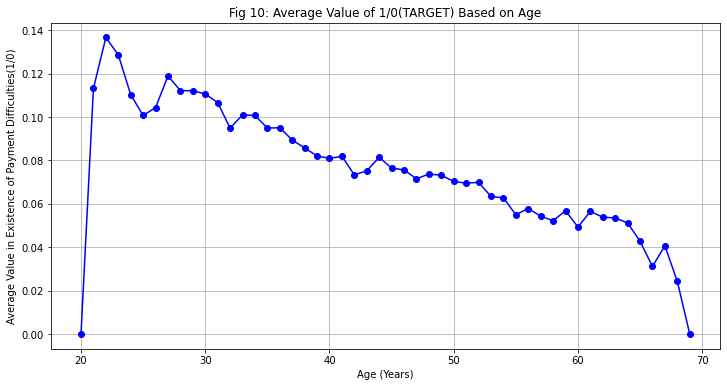

In [79]:
average_values = my_data.groupby('AGE_YEAR')['TARGET'].mean().reset_index()
# line plot
plt.figure(figsize=(12, 6))
plt.plot(average_values['AGE_YEAR'], average_values['TARGET'], marker='o', linestyle='-', color='b')
plt.title('Fig 10: Average Value of 1/0(TARGET) Based on Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.grid(True)
plt.show()

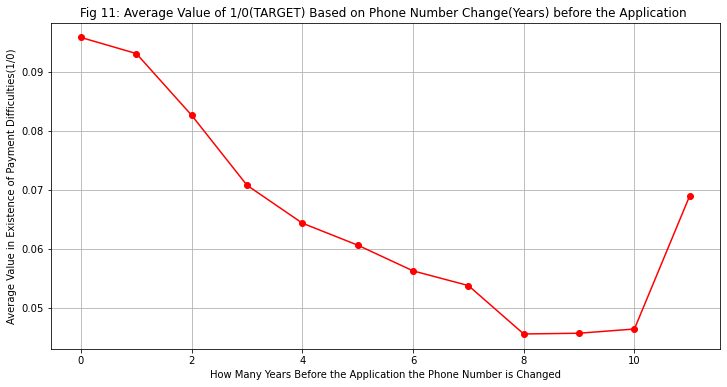

In [80]:
## Years_LAST_PHONE_CHANGE
average_values = my_data.groupby('Years_LAST_PHONE_CHANGE')['TARGET'].mean().reset_index()
# line plot
plt.figure(figsize=(12, 6))
plt.plot(average_values['Years_LAST_PHONE_CHANGE'], average_values['TARGET'], marker='o', linestyle='-', color='r')
plt.title('Fig 11: Average Value of 1/0(TARGET) Based on Phone Number Change(Years) before the Application ')
plt.xlabel('How Many Years Before the Application the Phone Number is Changed')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.grid(True)
plt.show()

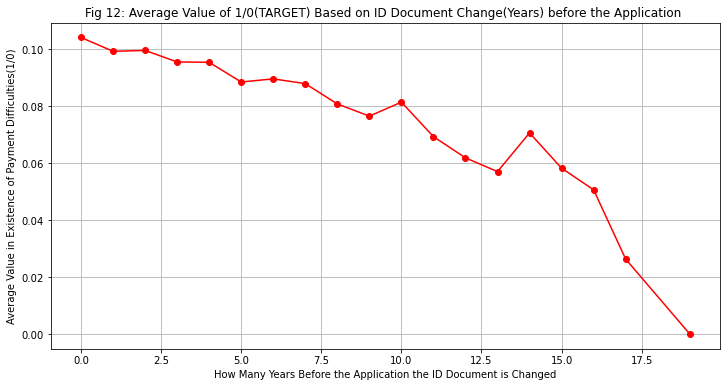

In [81]:
## Years_LAST_ID_CHANGE
average_values = my_data.groupby('Years_LAST_ID_CHANGE')['TARGET'].mean().reset_index()
# line plot
plt.figure(figsize=(12, 6))
plt.plot(average_values['Years_LAST_ID_CHANGE'], average_values['TARGET'], marker='o', linestyle='-', color='r')
plt.title('Fig 12: Average Value of 1/0(TARGET) Based on ID Document Change(Years) before the Application ')
plt.xlabel('How Many Years Before the Application the ID Document is Changed')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.grid(True)
plt.show()

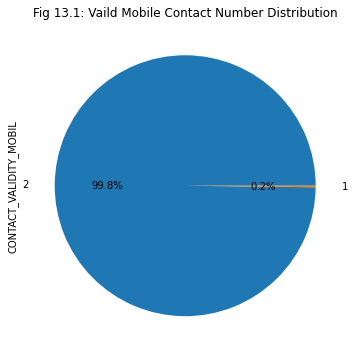

In [82]:
## CONTACT_VALIDITY_MOBIL
plt.figure(figsize=(10, 6))
my_data.CONTACT_VALIDITY_MOBIL.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1.2)
plt.title('Fig 13.1: Vaild Mobile Contact Number Distribution')
plt.show()

Almost all applicants provided valid Mobile Number. 
Consdiering the volumn of our data, it should be okay to carry on analysis with this variable.

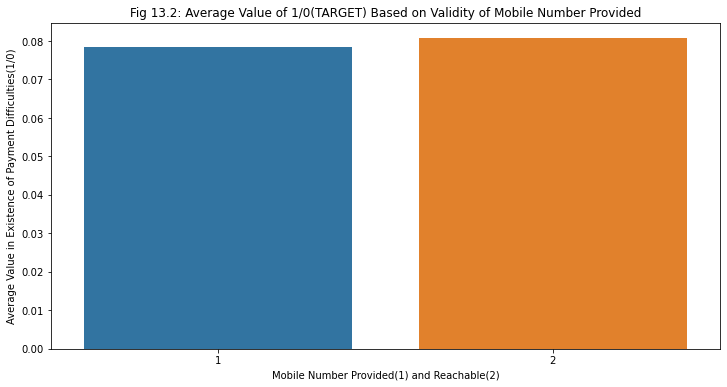

In [84]:
average_values = my_data.groupby('CONTACT_VALIDITY_MOBIL')['TARGET'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='CONTACT_VALIDITY_MOBIL', y='TARGET', data=average_values)
plt.title('Fig 13.2: Average Value of 1/0(TARGET) Based on Validity of Mobile Number Provided')
plt.xlabel('Mobile Number Provided(1) and Reachable(2)')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()

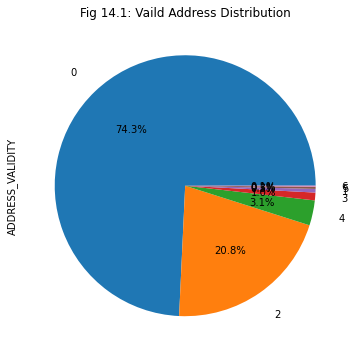

In [85]:
## ADDRESS_VALIDITY
plt.figure(figsize=(10, 6))
my_data.ADDRESS_VALIDITY.value_counts(normalize = True).plot.pie(autopct='%1.1f%%',labeldistance=1.2)
plt.title('Fig 14.1: Vaild Address Distribution')
plt.show()

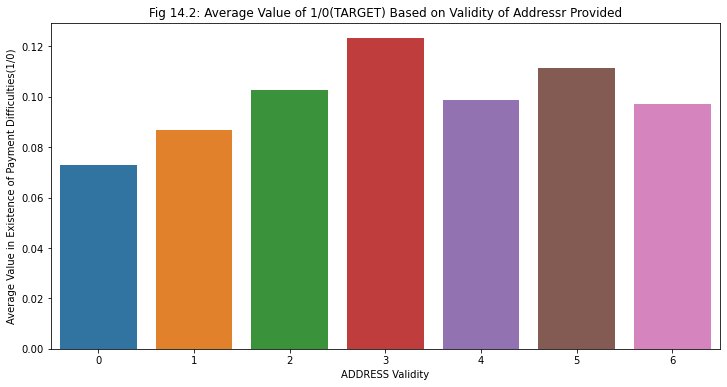

In [86]:
average_values = my_data.groupby('ADDRESS_VALIDITY')['TARGET'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='ADDRESS_VALIDITY', y='TARGET', data=average_values)
plt.title('Fig 14.2: Average Value of 1/0(TARGET) Based on Validity of Addressr Provided')
plt.xlabel('ADDRESS Validity')
plt.ylabel('Average Value in Existence of Payment Difficulties(1/0)')
plt.show()